In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import statsmodels.api as sm

In [2]:
# Read case data
df = pd.read_excel("6. Case 5 - Mann-Whitney U test.xlsx")

In [3]:
# Print data head
df.head()

,SalesPerson,New_Inc,Units_Sold
0,1,Incentive,27
1,2,Incentive,23
2,3,Incentive,23
3,4,Incentive,23
4,5,Incentive,25


In [4]:
# Create arrays with units sold for 'incentive' and 'no incentive'
data_incentive = df[df["New_Inc"] =="Incentive"]["Units_Sold"].values
data_no_incentive = df[df["New_Inc"] =="No Incentive"]["Units_Sold"].values

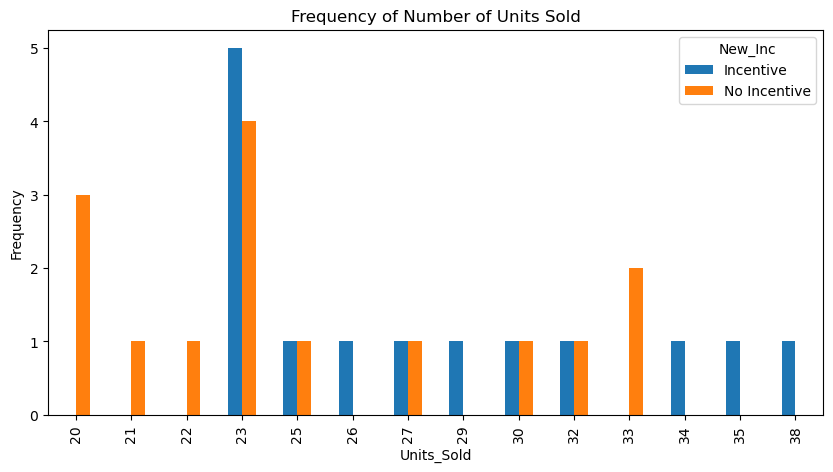

In [5]:
# Plot the clustered bar charts for 'incentive' and 'no incentive'
# Notice that due to the categorical nature of the data, we have to opt for clustered bar charts (instead of histograms)
# Create a crosstab
ct = pd.crosstab(df["Units_Sold"], df["New_Inc"])

# Create the plot with the specified figure size
ct.plot(kind="bar", stacked=False, figsize=(10, 5))

# Set the labels
plt.xlabel("Units_Sold")
plt.ylabel("Frequency")
plt.title("Frequency of Number of Units Sold")

plt.show()

Based on the histograms of both variables reveals that the data are not normally distributed.

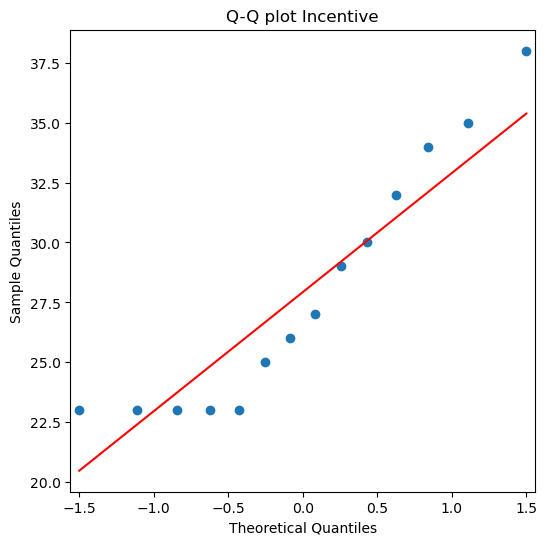

In [6]:
# Create Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_incentive, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot Incentive")

# Display the chart
plt.show()

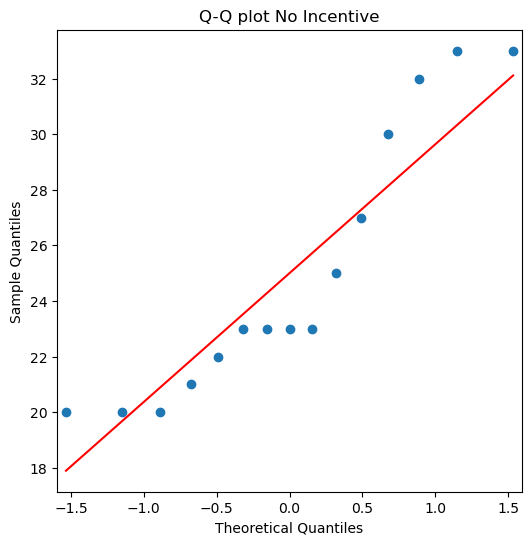

In [7]:
# Create Q-Q plot
fig, ax = plt.subplots(figsize=(6,6))
sm.qqplot(data_no_incentive, line='s', ax=ax, fmt='b')

# Set the chart title and axis labels
ax.set_title("Q-Q plot No Incentive")

# Display the chart
plt.show()

Based on the Q-Q plots, the data are non-normally distributed.

Next, let's conduct a Shapiro-Wilk test to confirm whether this can be done. The significance level will be set to 0.05.

In [8]:
# Run Shapiro-Wilk test for normality (Incentive)
shapiro(data_incentive)

ShapiroResult(statistic=0.8745478334808892, pvalue=0.04863154978118139)

In [9]:
# Run Shapiro-Wilk test for normality (No incentive)
shapiro(data_no_incentive)

ShapiroResult(statistic=0.8484412911388926, pvalue=0.016506820714392346)

In both cases, the p-values are below 0.05. We conclude that the data are not normally distributed at the significance level of 0.05. We must choose a non-parametric method for this test.